# EDA

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
# Reading in the data
df = pd.read_csv('../data/genre_clean.csv')

In [3]:
# Taking a look at the data
df.head()

,files,zero_crossing_rate,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,labels,y
0,classical.00095.wav,0.124354,1800.888692,3427.243261,-422.539001,89.848892,-18.736307,37.781479,5.998186,4.155726,-1.990408,12.125071,4.162500,13.789366,2.827351,5.892111,6.119672,classical,2
1,rock.00034.wav,0.134925,2788.250576,5831.991493,-28.014143,65.664986,-7.318477,33.754238,11.125959,14.607222,2.095349,10.010470,-0.225996,10.134683,-2.854557,3.099468,-1.664788,rock,10
2,pop.00004.wav,0.123709,2753.120791,5986.680118,-20.897747,83.238922,5.046143,16.362432,9.404126,-0.563406,4.042763,6.208806,9.122958,5.869022,-3.498068,-0.633253,-3.170406,pop,8
3,jazz.00088.wav,0.069027,2427.985227,5925.810932,-192.507477,80.970596,25.695179,18.540184,14.171223,1.257420,4.086614,-1.414906,2.667313,5.245388,3.723577,0.289519,7.333017,jazz,6
4,metal.00006.wav,0.198043,3236.925340,6227.983557,-140.729111,55.937737,-12.313358,44.344326,-10.599383,10.875739,-0.949337,22.253336,-9.380368,15.242425,-3.061906,9.060850,-8.804061,metal,7


In [4]:
# Looking at some descriptive statistics
df.describe()

,zero_crossing_rate,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,y
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.108804,2264.857452,4669.217925,-146.473895,98.270647,-10.098673,35.334242,-1.825496,13.070048,-4.877805,9.161498,-6.203917,7.390750,-5.778090,4.595463,-4.557887,6.333333
std,0.042553,753.020554,1688.540227,114.511089,33.935166,23.827417,17.904528,11.972958,12.135126,9.863391,11.295889,8.518796,8.325368,6.319749,6.936631,6.158342,2.496520
min,0.031534,690.200858,749.140636,-552.119934,22.764702,-89.870110,-18.727543,-33.652279,-28.415909,-27.755732,-24.915802,-31.640577,-12.050173,-24.382338,-15.796453,-20.867882,2.000000
25%,0.074809,1651.278903,3350.692558,-214.531517,73.298302,-27.696521,20.816819,-10.778709,3.576122,-12.654278,0.291333,-12.414088,0.927247,-10.322685,-0.523346,-9.157159,5.000000
50%,0.106386,2320.746061,4786.141592,-111.448570,94.104511,-12.867982,35.463184,-1.200795,11.715296,-6.032556,7.737960,-6.755645,6.115301,-5.859298,3.580809,-3.916333,6.500000
75%,0.140548,2795.023727,5750.006401,-63.431393,121.808136,5.414056,48.915980,7.303526,23.132443,3.075375,19.104031,0.462762,14.236465,-1.164034,9.881333,0.214555,8.000000
max,0.261637,4225.533439,8677.672688,26.711782,193.097321,56.682770,79.355614,31.440573,42.643360,21.827351,49.011353,19.133018,27.099239,10.489644,23.034863,13.051320,10.000000


## Plotting Mel Spectrograms

In [5]:
def plot_spectrogram(genre):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre.
    '''
    
    # Loading in the audio file
    y, sr = librosa.core.load(f'../data/wavfiles/{genre}.00000.wav')
    
    # Computing the spectrogram and transforming it to the decibal scale
    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    spect = librosa.power_to_db(spect, ref=np.max) # Converting to decibels
    
    # Plotting the transformed spectrogram
    plt.figure(figsize=(10,7))
    librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
    plt.title(str(genre))
    plt.show()

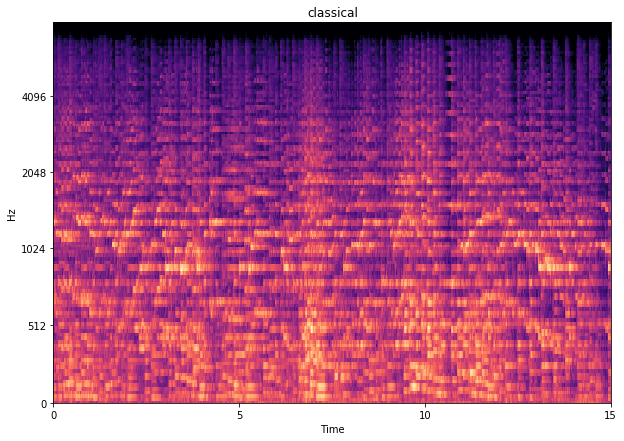

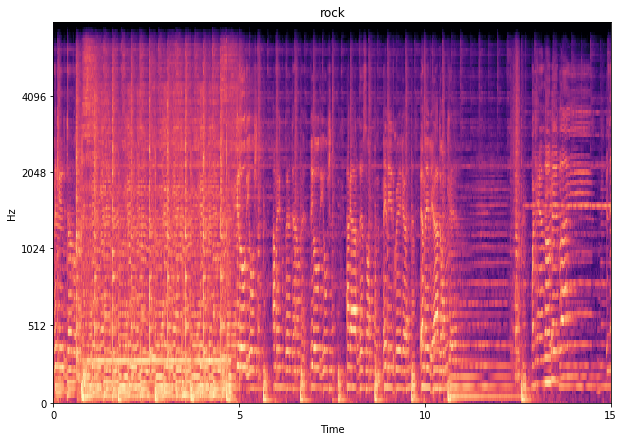

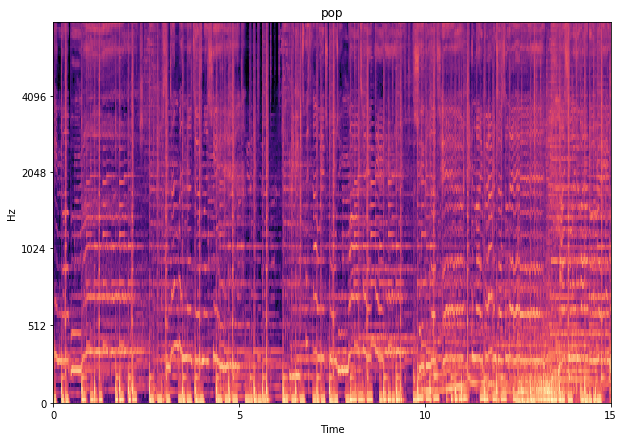

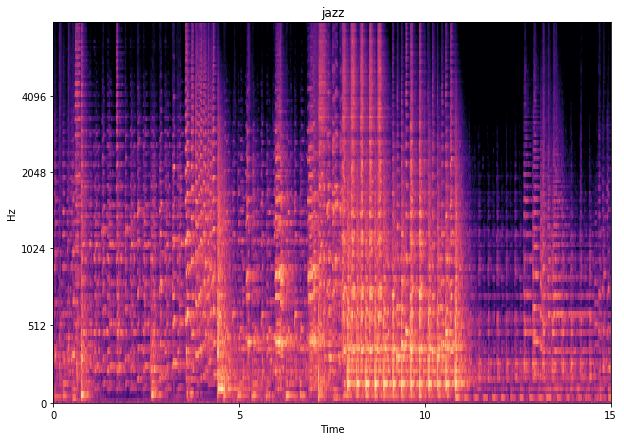

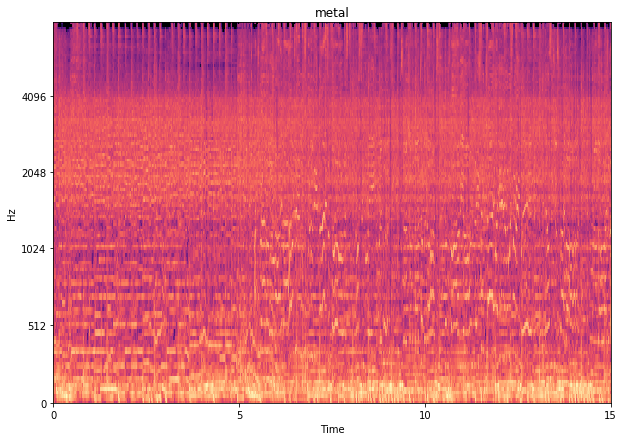

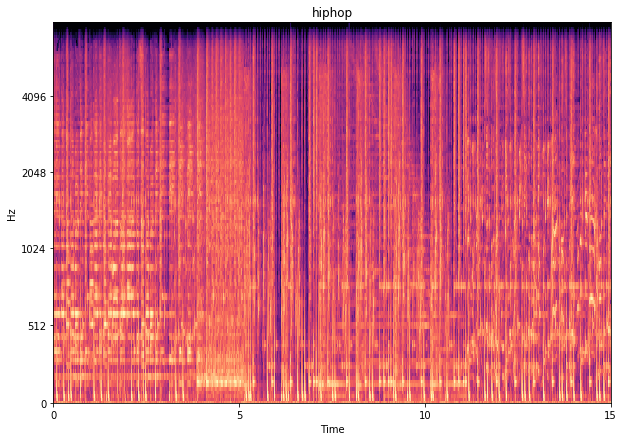

In [6]:
# Creating a list of all the genres
genres = list(df['labels'].unique())

# Plotting spectrogram for each genre
for genre in genres:
    plot_spectrogram(genre)

In [7]:
def spectrogram_subplots(genre):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre in a 5 x 2 grid.
    '''
    
    # Defining the subplots
    fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (25,10))
    ax = ax.ravel() # Turning ax into a matrix to make it easier to work with

    # Looping through the list of genres
    for i, kind in enumerate(genre):
        
        # Reading in the first file from each genre
        y, sr = librosa.core.load(f'../data/wavfiles/{kind}.00000.wav')
        
        # Computing the mel spectrogram
        spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spect = librosa.power_to_db(spect, ref=np.max)
        
        # Displaying the mel spectrogram 
        librosa.display.specshow(spect, y_axis = 'mel', fmax = 8000, x_axis = 'time', ax = ax[i])
        ax[i].set_title(str(kind))

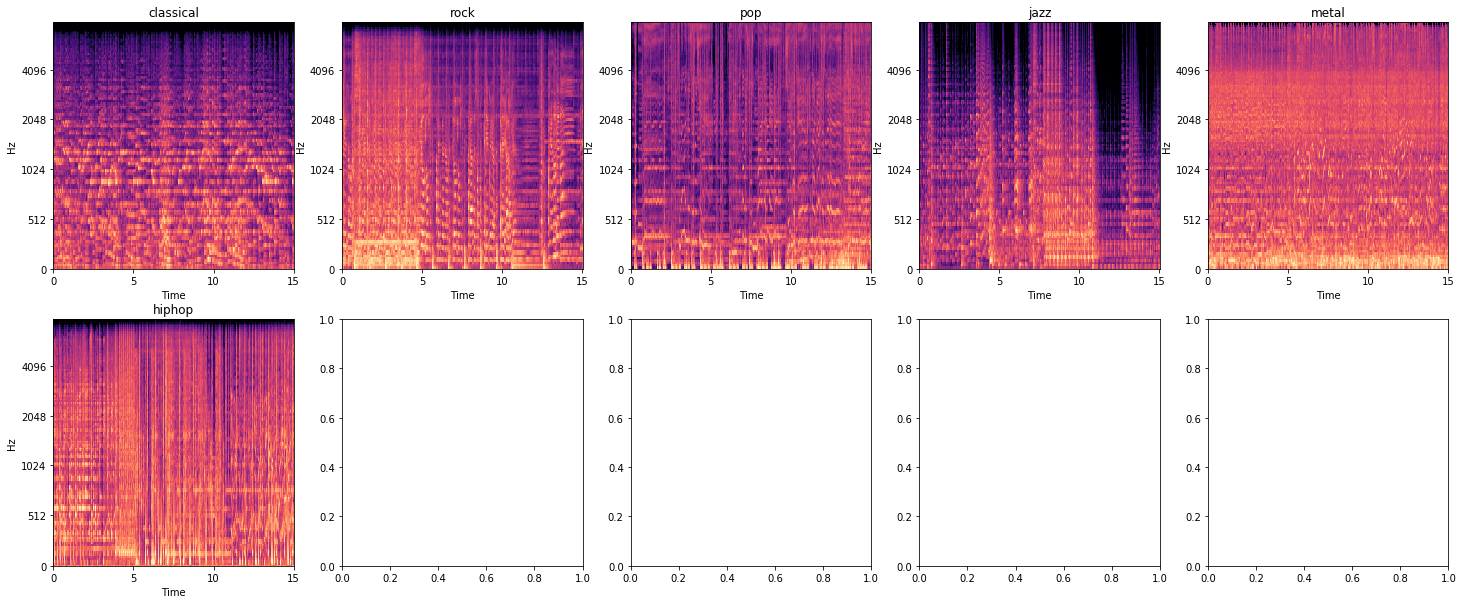

In [8]:
spectrogram_subplots(genres)

## Correlations

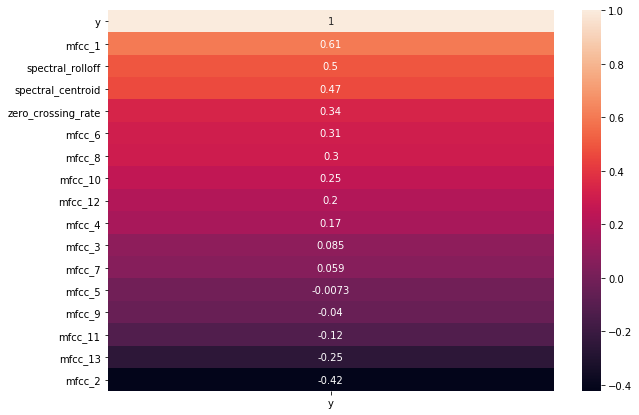

In [9]:
# Checking correlations
plt.figure(figsize=(10,7))
sns.heatmap(df.corr()[['y']].sort_values('y', ascending=False), annot=True);